In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models, layers, callbacks

import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

In [2]:
class myCallback(callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAccuracy is greater than 96% so terminating training!")
      self.model.stop_training = True

callbacks = myCallback()

In [3]:
train_df = tf.keras.preprocessing.image_dataset_from_directory(
    'animal dataset/train',
    image_size=(256,256),
    shuffle=True,
    batch_size=32
)

Found 2400 files belonging to 3 classes.


In [4]:
# 800 x 3 = 2400 images, 1 0f each class

In [5]:
len(train_df)   

75

75 batches. Each batch has 32 images. 32 x 75 = 2400 images

In [6]:
test_df = tf.keras.preprocessing.image_dataset_from_directory(
    'animal dataset/test',
    image_size=(256,256),
    shuffle=True,
    batch_size=32
)

val_df = tf.keras.preprocessing.image_dataset_from_directory(
    'animal dataset/val',
    image_size=(256,256),
    shuffle=True,
    batch_size=32
)


Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [7]:
len(test_df), len(val_df)

(10, 10)

### DATA EXPLORATION

In [8]:
classes = train_df.class_names
classes

['cats', 'dogs', 'panda']

In [9]:
batch1 = train_df.take(1)

In [10]:
for image, label in batch1:
    print(image.shape)
    print(label.numpy())

(32, 256, 256, 3)
[2 2 0 2 2 1 1 1 0 2 1 1 2 0 0 0 1 0 2 2 1 0 0 1 1 2 1 1 0 0 2 0]


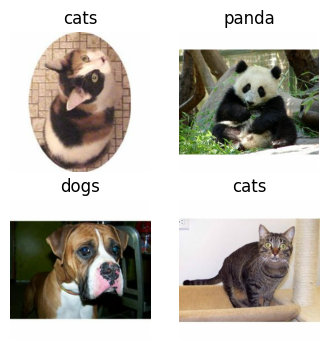

In [11]:
plt.figure(figsize=(4,4))
for image,label in train_df.take(1):
    for i in range(4):
        ax = plt.subplot(2,2,i+1),
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(classes[label[i]])
        plt.axis('off')

In [12]:
# CACHING & PREFETCHING TO MAKE THE PIPELINE HIGH PERFORMANT :

train_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
resizing= models.Sequential(([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)

]))

In [14]:
augmentation= models.Sequential(([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical')

]))

### MODEL BUILDING

In [15]:
model= models.Sequential([
    resizing,
    augmentation,
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [16]:
model.build(input_shape=(32,256,256,3))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
epo=model.fit(
    train_df,
    epochs=100,
    verbose=1,
    batch_size=32,
    validation_data=val_df,
    callbacks=[callbacks]
)

Epoch 1/100
75/75 [==============================] - 111s 1s/step - loss: 0.9255 - accuracy: 0.5046 - val_loss: 0.7326 - val_accuracy: 0.6333
Epoch 2/100
75/75 [==============================] - 106s 1s/step - loss: 0.8176 - accuracy: 0.5696 - val_loss: 0.7521 - val_accuracy: 0.6000
Epoch 3/100
75/75 [==============================] - 116s 2s/step - loss: 0.7734 - accuracy: 0.6004 - val_loss: 0.7545 - val_accuracy: 0.6000
Epoch 4/100
75/75 [==============================] - 107s 1s/step - loss: 0.7360 - accuracy: 0.6225 - val_loss: 0.6839 - val_accuracy: 0.6300
Epoch 5/100
75/75 [==============================] - 105s 1s/step - loss: 0.7291 - accuracy: 0.6325 - val_loss: 0.6641 - val_accuracy: 0.6600
Epoch 6/100
75/75 [==============================] - 106s 1s/step - loss: 0.7003 - accuracy: 0.6438 - val_loss: 0.6633 - val_accuracy: 0.6833
Epoch 7/100
75/75 [==============================] - 105s 1s/step - loss: 0.7153 - accuracy: 0.6400 - val_loss: 0.6607 - val_accuracy: 0.6467
Epoch 

In [20]:
score=model.evaluate(test_df)

10/10 [==============================] - 3s 257ms/step - loss: 0.6178 - accuracy: 0.8367


In [21]:
epo.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
loss = epo.history["loss"]
val_loss = epo.history["val_loss"]
acc = epo.history["accuracy"]
val_acc = epo.history["val_accuracy"]

In [23]:
len(acc), len(val_acc)

(98, 98)

Text(0.5, 1.0, 'Training & Validation Accuracy')

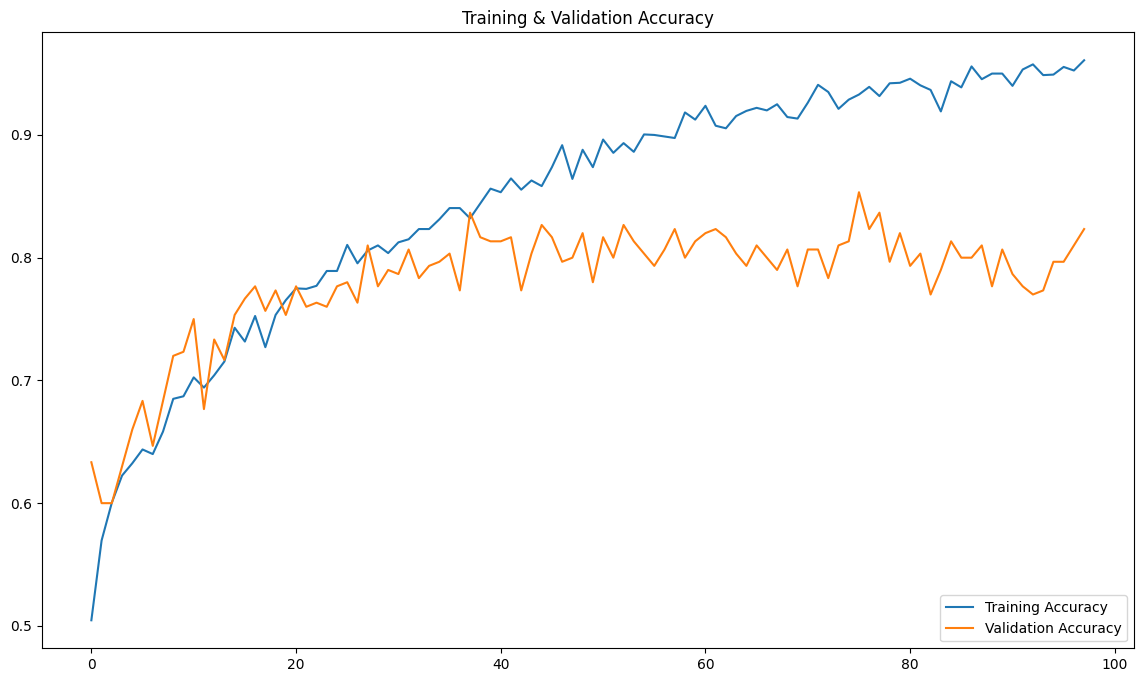

In [25]:
plt.figure(figsize=(31,8))
plt.subplot(1,2,1)
plt.plot(range(98), acc, label='Training Accuracy')
plt.plot(range(98), val_acc, label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title('Training & Validation Accuracy')

Text(0.5, 1.0, 'Training & Validation Loss')

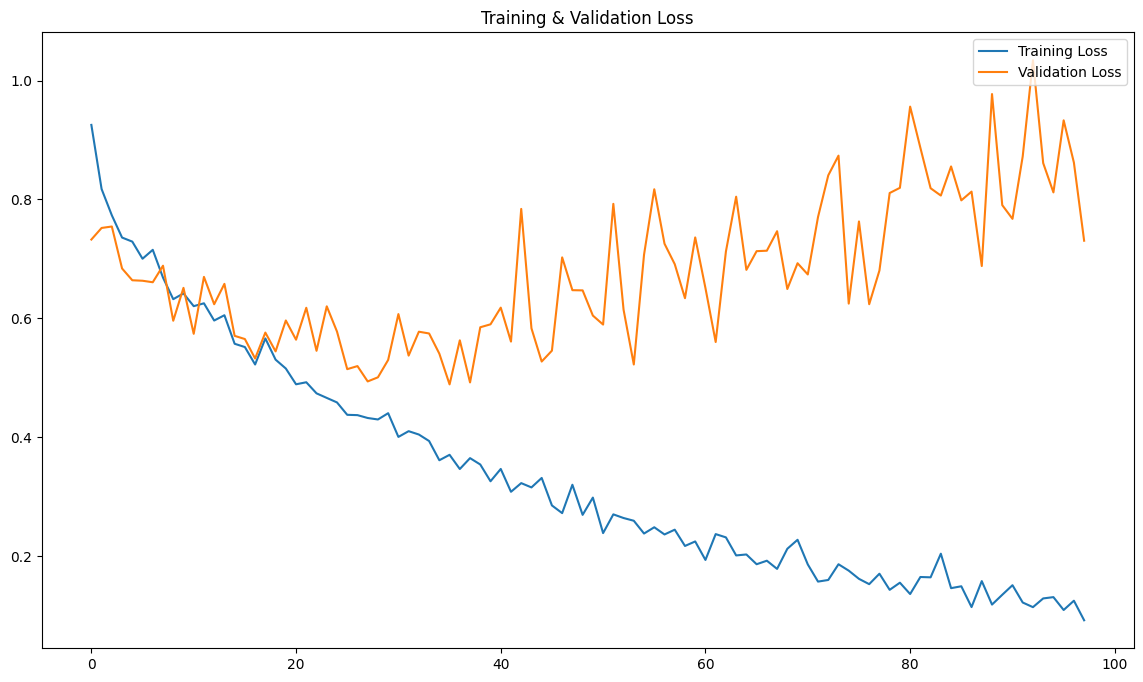

In [26]:
plt.figure(figsize=(31,8))
plt.subplot(1,2,1)
plt.plot(range(98), loss, label='Training Loss')
plt.plot(range(98), val_loss, label='Validation Loss')
plt.legend(loc="upper right")
plt.title('Training & Validation Loss')

### testing

In [28]:
batch1 =test_df.take(1)

1/1 [==============================] - 0s 377ms/step

True : panda
Predicted : panda


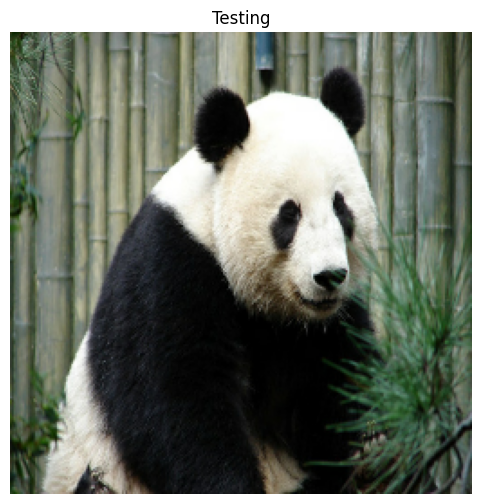

In [35]:
plt.figure(figsize=(6,6))
for img, clf in batch1:
    random_img = img[0].numpy().astype('uint8')
    typ = clf[0].numpy()

    plt.imshow(random_img)
    plt.axis('off')
    plt.title("Testing")
    prediction = model.predict(img)

    print("\nTrue :",classes[typ])
    print("Predicted :",classes[np.argmax(prediction[0])])

In [36]:
def pred(img):
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = tf.expand_dims(array,0)

    prediction = model.predict(array)

    clf = classes[np.argmax(prediction[0])]
    conf = round(100 * (np.max(prediction[0])), 2)
    return clf, conf

1/1 [==============================] - 0s 47ms/step


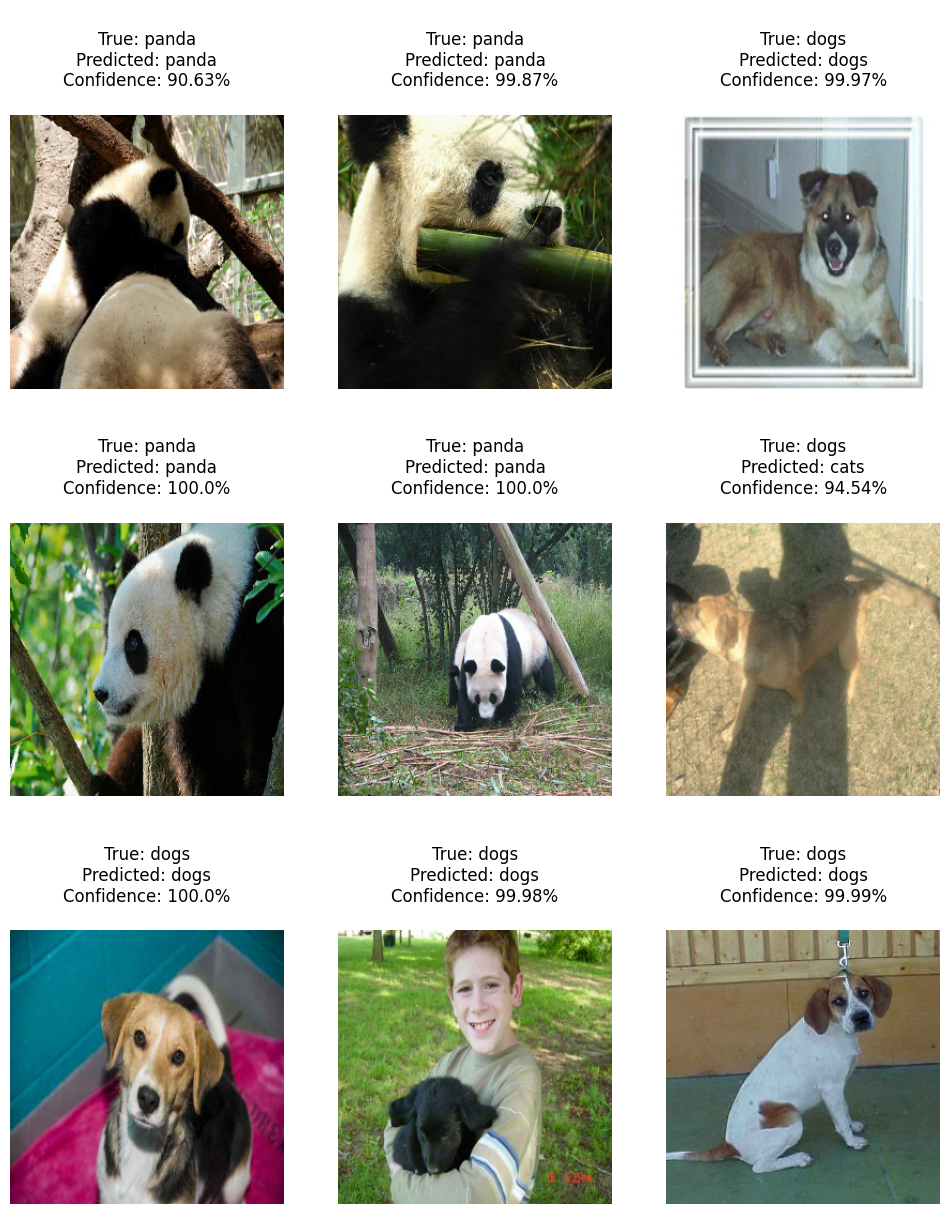

In [37]:
plt.figure(figsize=(12,15))
for img, lab in batch1:
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(img[i].numpy().astype('uint8'))

        prediction, confidence = pred(img[i].numpy())
        true = classes[lab[i]]
        plt.title(f"\nTrue: {true}\nPredicted: {prediction}\nConfidence: {confidence}%\n")
        plt.axis('off')

In [38]:
model.save('model.h5')